<div align="center">

# **Đồ án cuối kì**  
## **Lập trình cho Khoa học Dữ liệu**

</div>

## Tổng quan

### Giới thiệu và Mục đích Đồ án

Trong đồ án cuối kì môn *Lập trình cho Khoa học Dữ liệu*, bộ dữ liệu **Online Shoppers Purchasing Intention Dataset** được chọn phân tích để tìm hiểu hành vi của người dùng trên các website thương mại điện tử.

Mục tiêu của đồ án là phân tích và dự đoán khả năng người dùng thực hiện mua hàng. Nhóm sẽ tiến hành các bước như tiền xử lý dữ liệu, phân tích khám phá (EDA), trực quan hóa, xây dựng mô hình dự đoán và rút ra những yếu tố quan trọng ảnh hưởng đến quyết định mua hàng.

### Thành viên nhóm

<div align="center">

| STT | MSSV | Họ và tên |
| --- | ------ | ---- |
| 1 | 23127361 |  Thạch Ngọc Hân    |
| 2 | 23127466 |  Phan Như Quỳnh    |
| 3 | 23127488 |  Lê Thị Minh Thư    |

</div>

## A. Thu thập dữ liệu

### I. Giới thiệu và thông tin tập dữ liệu

#### Chủ đề

#### Nguồn dữ liệu

#### Giấy phép và quyền sử dụng
* **Loại giấy phép (License Type):**
    * Dữ liệu được phát hành dưới giấy phép **CC BY 4.0 (Creative Commons Attribution 4.0 International)**.
* **Quyền sử dụng cho mục đích giáo dục:**
    * **Có.** Giấy phép này cho phép tự do chia sẻ, sửa đổi và sử dụng dữ liệu cho mọi mục đích (bao gồm giáo dục và thương mại).
* **Các hạn chế và yêu cầu ghi nhận (Restrictions & Attribution):**
    * **Yêu cầu ghi nhận:** Bắt buộc phải trích dẫn nguồn gốc tác giả khi sử dụng.
    * **Trích dẫn chuẩn:**
      > Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention Dataset [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.
    * **Hạn chế:** Không có hạn chế pháp lý đặc biệt nào khác, miễn là tuân thủ việc ghi nhận nguồn.

#### Phương pháp thu thập dữ liệu
* **Phương pháp thu thập (Collection Method):**
    * Dữ liệu được thu thập thụ động thông qua việc theo dõi hành vi người dùng trên website thương mại điện tử.
    * **Phân tích URL:** Các tính năng hành vi (như *Administrative, Informational, ProductRelated*) được trích xuất từ thông tin URL của các trang mà người dùng truy cập.
    * **Google Analytics:** Các chỉ số hiệu suất web (như *Bounce Rate, Exit Rate, Page Value*) được lấy từ hệ thống **Google Analytics**.
    * **Thời gian thực:** Dữ liệu được cập nhật theo thời gian thực khi người dùng thực hiện hành động (ví dụ: chuyển trang).

* **Đối tượng và Phạm vi lấy mẫu (Target Population & Sampling):**
    * **Quy mô mẫu:** Tổng cộng 12,330 phiên truy cập (sessions).
    * **Chiến lược lấy mẫu:** Mỗi phiên truy cập trong bộ dữ liệu thuộc về một người dùng khác nhau (different user). Không có người dùng nào xuất hiện 2 lần.
    * **Khoảng thời gian (Time Period):** Dữ liệu được thu thập trong vòng **1 năm**.

* **Các hạn chế và sai số (Limitations & Biases):**
    * **Mất cân bằng dữ liệu (Class Imbalance):** Bộ dữ liệu có sự chênh lệch lớn giữa hai nhãn: 84.5% (10,422) là các phiên không mua hàng (Negative) và chỉ 15.5% (1,908) là các phiên có hành vi mua hàng (Positive). 
    * **Nguồn dữ liệu (Source Bias):** Dữ liệu đến từ một trang thương mại điện tử cụ thể, nên các hành vi có thể mang đặc thù của giao diện hoặc loại sản phẩm của trang web đó (ví dụ: hành vi mua đồ điện tử sẽ khác với mua quần áo).
    * **Tính năng "Ngày đặc biệt" (Special Day):** Biến số 'Special Day' được tính toán dựa trên logic giao hàng và lịch ngày lễ cụ thể của nơi thu thập dữ liệu gốc. Khi áp dụng mô hình này sang thị trường khác, cần phải tính toán lại biến số này dựa trên lịch ngày lễ và thói quen mua sắm của địa phương đó mới đảm bảo chính xác.

In [8]:

# CHỈ ĐỂ KIỂM TRA METADATA CỦA DỮ LIỆU
# # Cài đặt: pip install ucimlrepo
# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# online_shoppers = fetch_ucirepo(id=468)

# # data (as pandas dataframes)
# X = online_shoppers.data.features
# y = online_shoppers.data.targets

# print(online_shoppers.metadata) # Kiểm tra lại thông tin metadata

#### Lý do chọn dataset 

### II. Cấu trúc tập dữ liệu (metadata)

Tập dữ liệu có một bảng duy nhất, gồm 18 thuộc tính với tất cả thông tin được cấu trúc và mô tả như sau:

| STT | Thuộc tính              | Kiểu dữ liệu    | Ý nghĩa                                                    | Ghi chú                         |
| --- | ----------------------- | --------------- | ---------------------------------------------------------- | ------------------------------- |
| 1   | Administrative          | Numerical       | Số trang loại Administrative được xem trong phiên         | Cập nhật theo URL, tính theo thời gian thực |
| 2   | Administrative Duration | Numerical       | Tổng thời gian xem các trang Administrative               | Tính bằng giây                  |
| 3   | Informational           | Numerical       | Số trang loại Informational được xem                       |   Cập nhật theo URL, tính theo thời gian thực    |
| 4   | Informational Duration  | Numerical       | Tổng thời gian xem các trang Informational                |       Tính bằng giây                          |
| 5   | ProductRelated          | Numerical       | Số trang sản phẩm được xem                                 |  Cập nhật theo URL, tính theo thời gian thực |
| 6   | ProductRelated Duration | Numerical       | Tổng thời gian xem các trang sản phẩm                     |        Tính bằng giây                         |
| 7   | BounceRates             | Numerical       | Tỷ lệ người truy cập vào trang đầu rồi rời khỏi trang     | Theo Google Analytics           |
| 8   | ExitRates               | Numerical       | Tỷ lệ lượt xem trang cuối trong phiên                     | Theo Google Analytics           |
| 9   | PageValues              | Numerical       | Giá trị trung bình của trang trước khi hoàn tất giao dịch | Theo Google Analytics           |
| 10  | SpecialDay              | Numerical | Mức độ gần với các ngày đặc biệt (Valentine, Black Friday…) | Giá trị 0–1, tính theo khoảng cách ngày đặt hàng và ngày giao hàng |
| 11  | Month                   | Categorical     | Tháng trong năm                                            | Jan–Dec                         |
| 12  | OperatingSystems        | Numerical       | Hệ điều hành của thiết bị truy cập                         |            |
| 13  | Browser                 | Numerical       | Trình duyệt sử dụng                                        |                  |
| 14  | Region                  | Numerical       | Mã khu vực địa lý của người truy cập                       |   |
| 15  | TrafficType             | Numerical       | Loại nguồn truy cập                                        |       |
| 16  | VisitorType             | Categorical     | Người dùng mới hay quay lại                                | Returning_Visitor, New_Visitor                  |
| 17  | Weekend                 | Boolean         | Phiên truy cập vào cuối tuần                               |                       |
| 18  | Revenue                 | Boolean         | Session có dẫn đến mua hàng không                          | Nhãn lớp (class label)          |



## B. Khám phá dữ liệu

Phần này nhóm sẽ khám phá dataset bằng thống kê mô tả để hiểu rõ cấu trúc, chất lượng dữ liệu và mối quan hệ giữa các thuộc tính. Nhóm sẽ xác định các giá trị thiếu, không hợp lệ hoặc kiểu dữ liệu không phù hợp, đồng thời phân tích tương quan giữa các biến số và kiểm tra các mối quan hệ giữa các thuộc tính phân loại và số. Qua đó, nhóm sẽ xác định các bước tiền xử lý cần thiết để dữ liệu trở nên rõ ràng, đầy đủ và dễ sử dụng cho các phân tích tiếp theo.

### I. Đọc dữ liệu

In [9]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("Data/online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### II. Tổng quan dataset

#### 1. Thông tin cơ bản
- Số hàng (số phiên truy cập) trong dataset  
- Số cột (thuộc tính) trong dataset  
- Mỗi hàng đại diện cho gì (ví dụ: một phiên truy cập của khách hàng)  
- Kích thước tổng thể của dataset  

#### 2. Tính toàn vẹn dữ liệu
- Có hàng trùng lặp không? Nếu có, bao nhiêu?  
- Quyết định giữ hay loại bỏ các hàng trùng lặp và lý do  
- Có hàng hoàn toàn trống không?

#### 3. Inventory các cột
- Ý nghĩa / định nghĩa của từng cột  
- Các cột quan trọng cho phân tích  
- Cột nào có thể loại bỏ, lý do  

#### 4. Kiểu dữ liệu
- Kiểu dữ liệu hiện tại của từng cột  
- Cột nào có kiểu dữ liệu không phù hợp  
- Cột nào cần chuyển đổi kiểu dữ liệu

### II. Về các cột Numerical
#### Phân phối và xu hướng trung tâm
- Hình dạng phân phối (normal, skewed, bimodal, uniform)  
- Tạo biểu đồ: histogram, box plot, density plot  
- Tính toán: mean, median, standard deviation  

#### Khoảng giá trị và outliers
- Giá trị min/max của mỗi cột  
- Kiểm tra tính hợp lý của min/max  
- Xác định outliers bằng box plot, IQR hoặc z-score  
- Phân loại outliers là giá trị thật hay lỗi nhập dữ liệu

#### Chất lượng dữ liệu
- Tỷ lệ giá trị thiếu  
- Giá trị không hợp lý (ví dụ: âm, 0)  
- Giá trị placeholder (ví dụ: 999, -1, 0)  

In [11]:
df = pd.DataFrame(data)

# 1. LẤY CÁC CỘT SỐ
numerical_list = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues','SpecialDay']
numerical_df = df[numerical_list]
# numerical_df

In [12]:
# FUNCTION FOR FINDING GENERAL INFORMATION ABOUT NUMERICAL COLUMNS

# --- A. DISTRIBUTION & CENTRAL TENDENCY ---
def distri_num_col_info(col):
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    skewness = df[col].skew()
    
    print(f"\n1. Xu hướng tập trung:")
    print(f"   - Mean (Trung bình): {mean_val:.2f}")
    print(f"   - Median (Trung vị): {median_val:.2f}")
    print(f"   - Std Dev (Độ lệch chuẩn): {std_val:.2f}")
    print(f"   - Skewness (Độ lệch): {skewness:.2f}")
    
    # Đánh giá hình dáng phân phối
    if -0.5 < skewness < 0.5: shape = "Đối xứng (Normal-like)"
    elif skewness <= -0.5: shape = "Lệch trái (Left Skewed)"
    else: shape = "Lệch phải (Right Skewed)"
    print(f"\t-> Phân phối dữ liệu: {shape}")

    
# --- B. RANGE & OUTLIERS ---
def range_outliers_num_col_info(col):
    min_val = df[col].min()
    max_val = df[col].max()
    
    # Tính IQR để tìm Outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"\n2. Phạm vi & Outliers:")
    print(f"   - Min: {min_val} | Max: {max_val}")
    print(f"   - Q1(25%): {Q1} | Q3(75%): {Q3} | IQR: {IQR}")
    print(f"   - Lower Bound: {lower_bound} | Upper Bound: {upper_bound}")
    print(f"   - Số lượng Outliers (IQR method): {len(outliers)} | Chiếm {len(outliers)/len(df[col])*100:.2f}%")

    # return outliers

# --- C. DATA QUALITY ---
def data_quality_num_col_info(col, valid_range =  None, suspicious_values = None):
    # - valid_range: Tuple (min, max). Ngoài khoảng này là Impossible.
    # - suspicious_values: List các giá trị nghi ngờ là placeholder. VD [999, -1]
    
    missing_count = df[col].isnull().sum()
    missing_pct = df[col].isnull().mean() * 100
    zeros_count = (df[col] == 0).sum()
    negatives_count = (df[col] < 0).sum()

    # Impossible Values dựa trên valid range
    impossible_count = 0
    if valid_range:
        min_val, max_val = valid_range
        # Đếm số lượng nằm ngoài khoảng min-max
        impossible_mask = (df[col]< min_val) | (df[col] > max_val)
        impossible_count = impossible_mask.sum()
        impossible_desc = f"Ngoài khoảng [{min_val}, {max_val}]"
        
    # 4. Placeholder Values dựa trên suspicious value 
    placeholder_count = 0
    if suspicious_values:
        placeholder_count = df[col].isin(suspicious_values).sum()

    
    print(f"\n3. Chất lượng dữ liệu:")
    print(f"   - Missing Count: {missing_count} | Missing Percentage: {missing_pct:.2f}%")
    print(f"   - Giá trị bằng 0: {zeros_count}")
    print(f"   - Negative Values: {negatives_count}")
    print(f"   - Impossible Values: {impossible_count}")
    print(f"   - Placeholders Values: {placeholder_count}")
    print("\n")
    

In [13]:
# FUNCTION FOR VISUALIZATION
def visualtion(col):
    # Khung vẽ, Hình 1 là Hist, Hình 2 là Box
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    # Vẽ Histogram
    sns.histplot(data=df, x=col, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Phân phối (Histogram) của {col}')

    # Vẽ Box Plot
    sns.boxplot(data=df, x=col, ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Outliers (Boxplot) của {col}')

    plt.show()

#### 1.1: Thống kê cho cột Administrative


1. Xu hướng tập trung:
   - Mean (Trung bình): 2.32
   - Median (Trung vị): 1.00
   - Std Dev (Độ lệch chuẩn): 3.32
   - Skewness (Độ lệch): 1.96
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0 | Max: 27
   - Q1(25%): 0.0 | Q3(75%): 4.0 | IQR: 4.0
   - Lower Bound: -6.0 | Upper Bound: 10.0
   - Số lượng Outliers (IQR method): 404 | Chiếm 3.28%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 5768
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




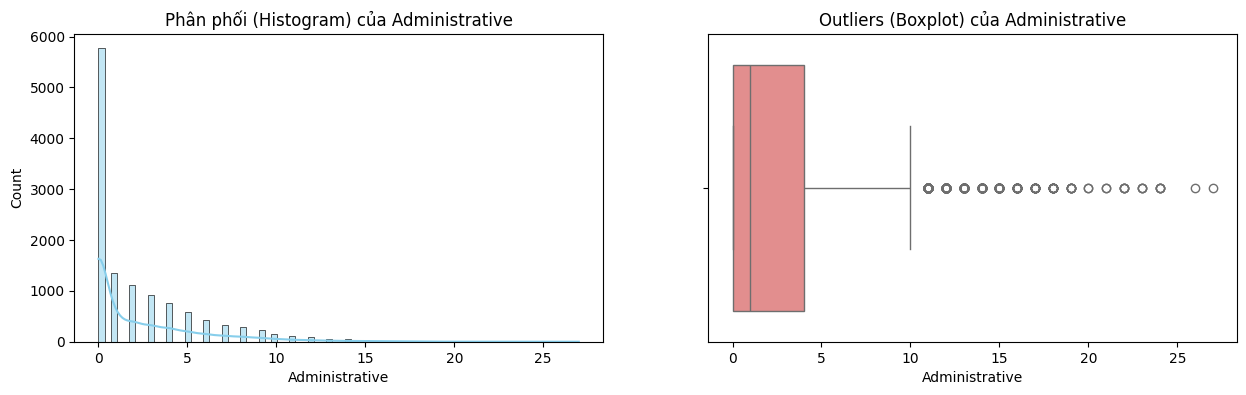

In [15]:
col = 'Administrative'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 1.2 Phân tích về thống kê cột dữ liệu số Administrative
  * **1. Về Phân phối (Distribution)**
    * **Dạng phân phối:** Dữ liệu bị lệch phải nặng (Highly Right-Skewed). Đuôi của biểu đồ kéo dài về phía các giá trị lớn.
    * **Đỉnh (Mode):** Cột cao nhất nằm ở giá trị 0. Cho thấy phần lớn các giá trị quan sát trong dữ liệu có giá trị là 0. Đa số người dùng không truy cập trang Administrative (trang quản trị người dùng).
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, đường kẻ giữa hộp nằm rất lệch về phía bên trái (0, gần 0). Điều này xác nhận lại rằng 50% dữ liệu nằm ở mức thấp.
    * **Trung bình (Mean):** Do biểu đồ bị lệch phải và có nhiều giá trị ngoại lai lớn, vì vậy mà giá trị **trung bình lớn hơn trung vị**.

* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range:** Dữ liệu trải có **min** (giá trị nhỏ nhất) là 0 và **max** (giá trị lớn nhất) là 27. Các giá trị min và max này là hoàn toàn hợp lý với thông số của người dùng truy cập trang Administrative. Phần lớn dữ liệu (75%) từ 0 tới 4. Trong đó, dữ liệu 0 xuất hiện nhiều nhất.
    * **IQR (Interquartile Range):** Dựa vào Boxplot, ta thấy khoảng tứ phân vị trải từ Q1 (0) đến Q3 (4), độ rộng IQR = 4. Hộp Boxplot hẹp, bắt đầu từ 0 đến gần 5. Điều này cho thấy 50% dữ liệu ở giữa (nhóm trung bình) có biến động rất ít.
    * **Outliers (Giá trị ngoại lai)**:
        * Nhìn vào biểu đồ Boxplot, ta thấy có **rất nhiều outliers** ở phía bên phải.
        * Các điểm này bắt đầu từ khoảng giá trị **>10** và kéo dài đến tận **27** (giá trị max)
       * **Genuine Extreme Values or Data Entry Errors:** Ở góc độ Data Quality: Các outliers này là **dữ liệu thực (natural outliers)** chứ không phải lỗi nhập liệu. Vì chúng phân bố liên tục chứ không nhảy vọt lên (như 1000 hoặc số âm). Đây có thể là những nhóm khách hàng đặc biệt, hành động khác hẳn số đông. Vậy kết luận, các **outliers** này là **genuine extreme values**, có thể là nhóm những người có nhu cầu quản trị cao hơn hẳn người bình thường.

* **Chất lượng dữ liệu (Data Quality)**
  * Dựa vào thông số thống kê, biểu đồ histogram và boxplot của cột dữ lột dữ liệu này, ta thấy không có dữ liệu thiếu cũng như không có giá trị impossible (giá trị phi lý).
  * Mặc dù số **0** xuất hiện nhiều nhưng nó mang ý nghĩa thực tế (không truy cập) chứ không phải là placeholder cho dữ liệu rỗng.

#### 2.1 Thống kê cho cột Administrative Duration


1. Xu hướng tập trung:
   - Mean (Trung bình): 80.82
   - Median (Trung vị): 7.50
   - Std Dev (Độ lệch chuẩn): 176.78
   - Skewness (Độ lệch): 5.62
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 3398.75
   - Q1(25%): 0.0 | Q3(75%): 93.25625 | IQR: 93.25625
   - Lower Bound: -139.88437499999998 | Upper Bound: 233.14062499999997
   - Số lượng Outliers (IQR method): 1172 | Chiếm 9.51%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 5903
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




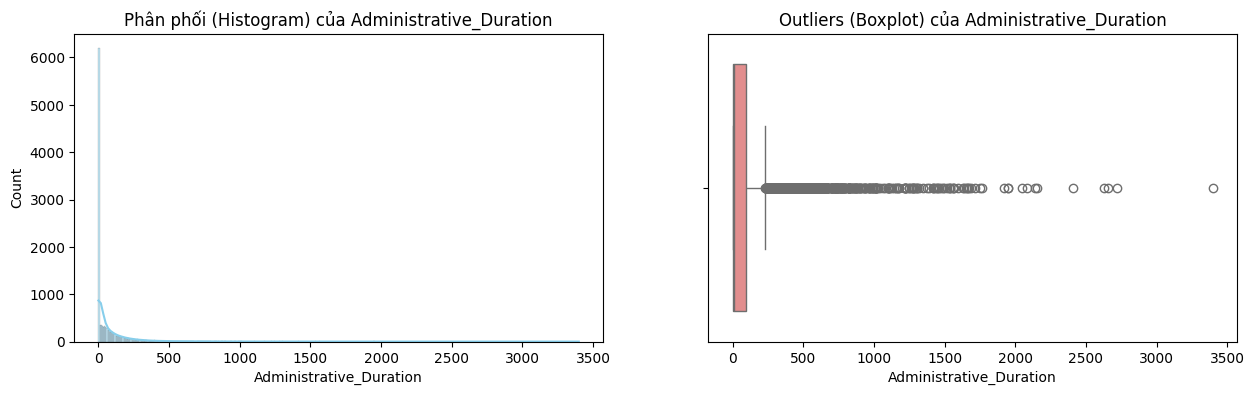

In [26]:
col = 'Administrative_Duration'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -999]] )
visualtion(col)

#### 2.2 Phân tích về thống kê cột Administrative Duration
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải rất nặng (Highly Right-Skewedl)**. Đuôi của biểu đồ Histogram kéo dài rất xa về phía bên phải, thể hiện một dải giá trị rộng.
  * **Đỉnh (Mode):** Cột cao nhất nằm ở giá trị 0 (tương ứng với cột Administrative count = 0). Điều này cho thấy phần lớn các phiên truy cập có thời gian lưu lại trang quản trị là 0 giây (người dùng không xem hoặc xem lướt qua cực nhanh), liên hệ với phân tích thống kê ở cột Administrative trước đó. Ta thấy, nguyên nhân chủ yếu là do đa số người dùng không truy cập vào trang này, nên đa số thời gian truy cập đều bằng 0.
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, đường kẻ đại diện cho trung vị nằm rất sát lề trái (gần mức 0). Điều này khẳng định 50% dữ liệu tập trung ở mức thời gian rất thấp.
    * **Trung bình (Mean):** Do biểu đồ bị lệch phải cực đại với các giá trị kéo dài đến hơn 3000, chắc chắn giá trị Trung bình sẽ lớn hơn rất nhiều so với Trung vị. Trung bình bị kéo lên bởi các phiên truy cập kéo dài.
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Thời gian truy cập nhỏ nhất là 0 và lớn nhất khoảng 3400 giây. Cho thấy độ biến thiên về thời gian truy cập là rất lớn.
    * **IQR (Interquartile Range):** Dựa vào Boxplot, hộp dữ liệu (thể hiện 50% dữ liệu ở giữa) bị nén rất hẹp ở khoảng giá trị thấp (ước lượng từ 0 đến dưới 100). Điều này cho thấy đa số người dùng có hành vi giống nhau: dành rất ít thời gian cho loại trang này.
    * **Outliers (Giá trị ngoại lai)**
        * Biểu đồ Boxplot hiển thị một lượng **Outliers dày đặc** kéo dài liên tục về phía bên phải.
        * Các điểm ngoại lai bắt đầu xuất hiện ngay sau upper bound (khoảng 250 giây) và kéo dài liên tục đến giá trị cực đại (~3400 giây).
       * **Genuine Extreme Values or Data Entry Errors:** Ở góc độ Data Quality, các outliers này là **dữ liệu thực (genuine extreme values)**. Thời gian 3400 giây (tương đương gần 1 giờ) là hoàn toàn khả thi đối với hành vi người dùng (có thể họ đang đọc kỹ điều khoản, hoặc đơn giản là treo máy/mở tab để đó). Sự phân bố liên tục của các điểm đen chứng tỏ không có sự đứt gãy dữ liệu vô lý.
* **Chất lượng dữ liệu (Data Quality)**
  * Dựa vào thông số thống kê và biểu đồ: Không có giá trị phi lý (thời gian < 0 là vô lý), histogram bắt đầu từ 0.
  * Tính đầy đủ: Không có dấu hiệu của dữ liệu thiếu hay placeholder lạ.
  * Dữ liệu sạch, hợp lý về mặt logic thời gian.
  

#### 3.1 Thống kê cho cột Informational


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.50
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 1.27
   - Skewness (Độ lệch): 4.04
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0 | Max: 24
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 2631 | Chiếm 21.34%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 9699
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




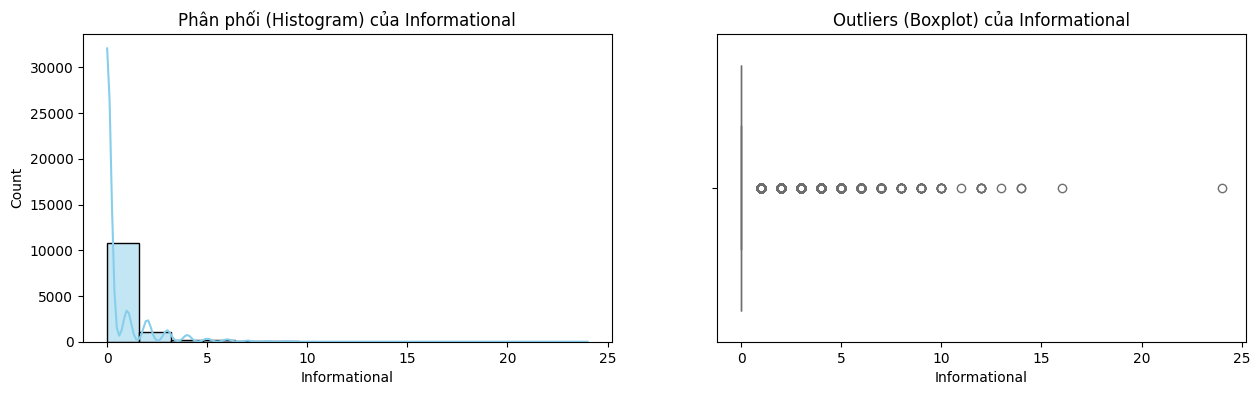

In [21]:
col = 'Informational'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -999, 99, 9999] )
visualtion(col)

#### 3.2 Phân tích về thống kê cột Informational
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải cực kỳ nặng (Extremely Right-Skewed)**. Biểu đồ Histogram gần như chỉ là một cột cao vút tại giá trị 0 và một cái đuôi rất mỏng kéo dài về phía bên phải.
  * **Đỉnh (Mode):** Cột cao nhất nằm tại giá trị 0. Điều này cho thấy tuyệt đại đa số người dùng không truy cập vào các trang "Informational".
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, phần "hộp" (thể hiện 50% dữ liệu giữa) bị ép dẹp lại thành một đường thẳng nằm ngay tại mức 0. Điều này xác nhận rằng có thể gần hoặc hơn 75% người dùng có số lượt xem trang Informational là 0.
    * **Trung bình (Mean):** Do sự hiện diện của các giá trị dương (từ 1 đến 24) trong khi phần lớn dữ liệu là 0, giá trị Trung bình (Mean) chắc chắn sẽ lớn hơn Trung vị (Median) (Mean > 0)
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải dài từ 0 đến 24. Người dùng không xem trang thông tin nào và xem nhiều nhất là 24 trang. Con số này là hoàn toàn phù hợp, vì người dùng có thể không có nhu cầu xem trang thông tin, con số 24 cũng hoàn toàn phù hợp: vì con số này không quá cao, một người hoàn toàn có khả năng xem 24 trang thông tin.
    * **IQR (Interquartile Range):** Dựa vào Boxplot, ta thấy Q1 và Q3 gần như trùng nhau tại 0 (hoặc Q3 rất nhỏ). Độ rộng IQR $\approx$ 0. Điều này cho thấy sự biến động của nhóm người dùng trung bình là không có hoặc cực kỳ thấp.
    * **Outliers (Giá trị ngoại lai)**
       * Biểu đồ Boxplot hiển thị các điểm ngoại lai (Outliers) bắt đầu xuất hiện ngay từ các giá trị rất nhỏ (khoảng từ 1 hoặc 2 trở đi) và kéo dài đến 24.
       * Trong trường hợp đặc biệt này, vì đa số mọi người không xem trang Informational, nên **bất kỳ ai xem trang này (dù chỉ 1-2 trang) cũng đã trở thành "ngoại lai"** về mặt thống kê so với đám đông.
     * **Genuine Extreme Values or Data Entry Errors:** Các outliers này là **dữ liệu thực (genuine values)**. Việc người dùng xem 1, 2, hay thậm chí 10 trang thông tin là hành vi hoàn toàn bình thường và khả thi trên một website thương mại điện tử, hơn nữa số lượt xem trang lớn nhất là 24, là hoàn toàn phù hợp. Không có dấu hiệu của lỗi nhập liệu.
* **Chất lượng dữ liệu (Data Quality)**
    * Dựa vào thông số thống kê và biểu đồ, ta thấy:
        * Không có giá trị âm, dữ liệu bắt đầu từ 0.
        * Không thấy các khoảng trống bất thường hay các cột mốc giá trị lạ (placeholder).
        * Dữ liệu sạch, phản ánh đúng thực tế hành vi người dùng (ít quan tâm đến trang thông tin), đạt yêu cầu chất lượng để phân tích.
  

#### 4.1 Thống kê cho cột Information Duration


1. Xu hướng tập trung:
   - Mean (Trung bình): 34.47
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 140.75
   - Skewness (Độ lệch): 7.58
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 2549.375
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 2405 | Chiếm 19.51%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 9925
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 2




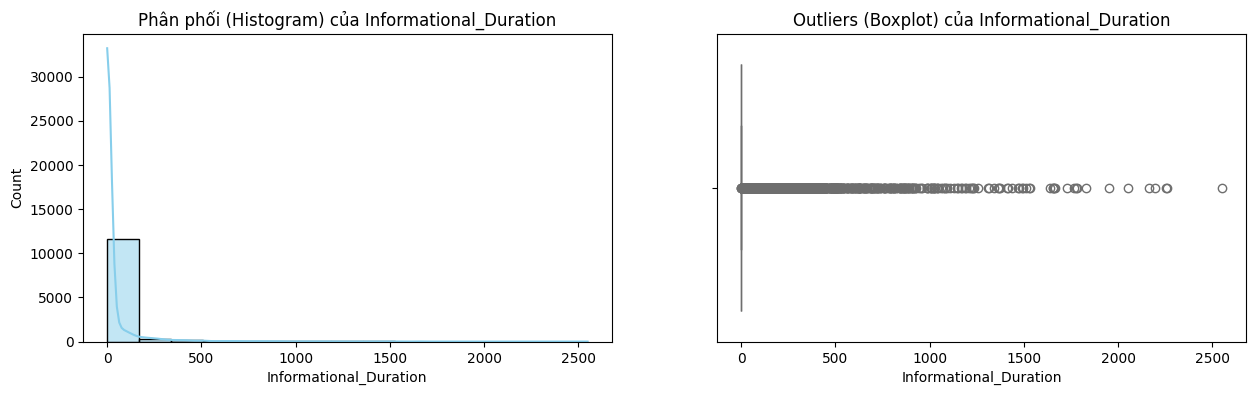

In [27]:
col = 'Informational_Duration'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 4.2 Phân tích về thống kê cột Information Duration
* **1. Về Phân phối (Distribution)** 
  * **Dạng phân phối:** Dữ liệu bị **lệch phải cực kì nặng (Extremely Right-Skewed)**. Biểu đồ Histogram cho thấy một cột cao vút tại giá trị 0 và phần đuôi kéo dài rất mỏng về phía bên phải.
  * **Đỉnh (Mode):** Giá trị xuất hiện nhiều nhất là 0. Điều này đồng nhất với cột Informational trước đó, cho thấy phần lớn người dùng dành 0 giây cho các trang thông tin (tức là họ không truy cập vào).
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Trên biểu đồ Boxplot, đường trung vị bị ép sát vào lề trái tại mức 0. Điều này khẳng định hơn 50% các phiên truy cập có thời gian xem trang thông tin là 0 giây.
    * **Trung bình (Mean):** Do sự xuất hiện của các phiên truy cập kéo dài (đuôi đồ thị kéo đến hơn 2500), giá trị Trung bình (Mean) lớn hơn Trung vị (Median).
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải dài từ 0 đến trên 2500 (giây). Khoảng biến thiên rất lớn so với mức trung bình.
    * **IQR (Interquartile Range):** IQR, Q1, và Q3 đều bằng 0. Điều này cho thấy nhóm người dùng có hành vi rất đồng nhất là không dành thời gian cho trang này.
    * **Outliers (Giá trị ngoại lai)**
        * Bởi vì IQR, Q1, và Q3 đều bằng 0, dẫn đến **upper bound và lower bound đều bằng 0**. Vì thế, các giá trị lớn hơn 0 đều là outliers. Biểu đồ Boxplot hiển thị một dải **Outliers dày đặc và liên tục** kéo dài từ ngay trên 0 cho đến hơn 2500.
       * **Genuine Extreme Values or Data Entry Errors:** Đây là **dữ liệu thực (genuine values)**. Việc người dùng dành vài phút đến gần một tiếng (2500 giây ≈ 41 phút) để đọc kỹ các chính sách bảo hành, thông tin vận chuyển hay giới thiệu doanh nghiệp là hành vi hoàn toàn có thể xảy ra, đặc biệt với những khách hàng kỹ tính. Sự phân bố liên tục của các điểm đen cho thấy không có lỗi nhập liệu đột biến.
* **Chất lượng dữ liệu (Data Quality)**
    * Dựa vào thông số thống kê và biểu đồ, ta thấy:
        * Dữ liệu hợp lệ, không có giá trị âm, dữ liệu bắt đầu từ 0.
        * Dữ liệu đầy đủ, không có dấu hiệu của dữ liệu thiếu hay placeholder bất thường.
        * Dữ liệu sạch và hợp lý về mặt logic. Tuy nhiên, do phần lớn dữ liệu tập trung tại 0, cột này có độ lệch rất cao, cần cân nhắc kỹ thuật xử lý (như phân nhóm người (nhóm có thời gian xem trên 0 và bằng 0))

#### 5.1 Thống kê cho cột Product Related


1. Xu hướng tập trung:
   - Mean (Trung bình): 31.73
   - Median (Trung vị): 18.00
   - Std Dev (Độ lệch chuẩn): 44.48
   - Skewness (Độ lệch): 4.34
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0 | Max: 705
   - Q1(25%): 7.0 | Q3(75%): 38.0 | IQR: 31.0
   - Lower Bound: -39.5 | Upper Bound: 84.5
   - Số lượng Outliers (IQR method): 987 | Chiếm 8.00%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 38
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




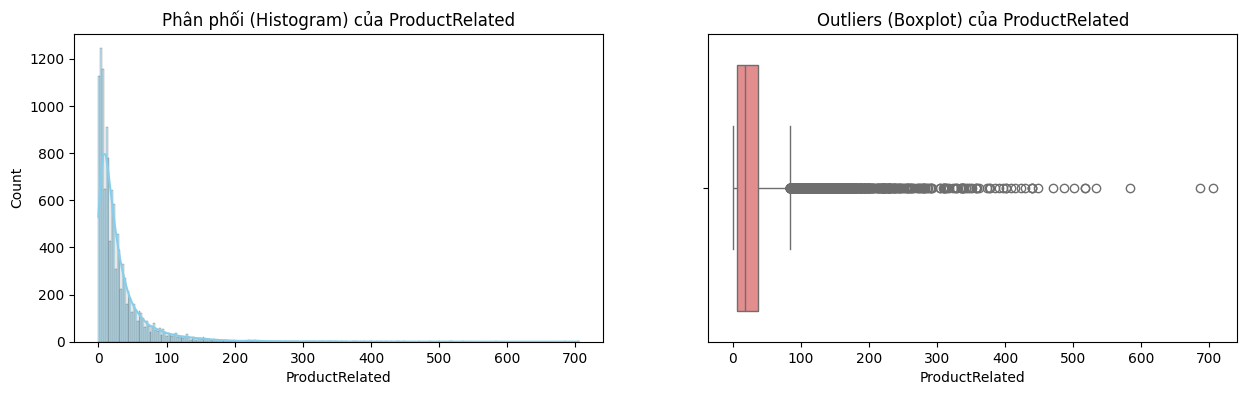

In [35]:
col = 'ProductRelated'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 9999] )
visualtion(col)

#### 5.2 Phân tích về thống kê cột Product Related
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị lệch phải (Right-Skewed). Mặc dù vẫn lệch, nhưng độ dốc của đường cong Histogram "thoải" hơn nhiều so với cột Informational. Phần đuôi kéo dài rất xa về phía bên phải.
  * **Đỉnh (Mode):** Cột cao nhất nằm ở khoảng giá trị thấp (0 đến 30). Lượng người dùng xem từ 1 trang đến hơn 50 trang sản phẩm là rất lớn. Điều này phản ánh đúng bản chất của trang thương mại điện tử: người dùng vào chủ yếu để lướt xem sản phẩm.
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, đường trung vị nằm rõ ràng ở giữa hộp (ước lượng khoảng 15-25), không bị dính vào mức 0. Điều này cho thấy trung bình một người dùng "bình thường" sẽ xem khoảng vài chục sản phẩm.
    * **Trung bình (Mean):** Do ảnh hưởng của phần đuôi dài (kéo đến 700) và lượng outliers khổng lồ, giá trị Trung bình (Mean = 31.71) lớn hơn đáng kể so với Trung vị (Median = 18.00).
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải dài từ 0 đến trên 700. Khoảng biến thiên lớn.
    * **IQR (Interquartile Range):** Dựa vào Boxplot, ta thấy boxplot có độ rộng rõ ràng. IQR bằng 31 cho thấy hành vi của nhóm khách hàng phổ thông có sự đa dạng nhất định (có người xem ít, có người xem vừa phải).
    * **Outliers (Giá trị ngoại lai)**
       * Biểu đồ Boxplot cho thấy một lượng **Outliers khổng lồ và dày đặc**. Các outliers xuất hiện và xuất hiện dày đặc từ khoảng giá trị 100 và kéo dài liên tục đến hơn 700.
       * **Genuine Extreme Values or Data Entry Errors:**
           * Các outlier có gía trị từ 100-400 chắc chắn trên 99% là **dữ liệu thực (genuine values)**. Vì việc một khách hàng xem 100-200 sản phẩm khi đi "dạo" (window shopping) là bình thường.Hơn nữa, các outliers này tập trung dày đăch, dữ liệu phân bố liên tục trong đoạn này, nên không có khả năng là lỗi nhập dữ liệu. có khả năng một vài outlier (từ mốc trên 500 trở lên) là **dữ liệu nhập sai**.
           * Các outliers có giá trị trên 500 - 700 vẫn nằm trong giới hạn khả thi (con người có thể click 700 lần trong một phiên dài). Mặc dù có khả năng nhỏ đây là hành vi của Bot/Crawler (máy quét), nhưng do dữ liệu không bị đứt gãy đột ngột (ví dụ nhảy vọt từ 400 lên 5000), ta có thể tạm kết luận đây là **dữ liệu thực (genuine values)**
* **Chất lượng dữ liệu (Data Quality)**
    * Dựa vào thông số thống kê biểu đồ:
        *  **Tính hợp lệ & Đầy đủ**: Dữ liệu sạch, không có giá trị âm hay giá trị phi lý (impossible), cũng như không có giá trị thay thế (placeholder).
        *  Dữ liệu có độ biến thiên cao (High Variance), Median khác 0. Đây là cột dữ liệu có chất lượng phân tích tốt nhất, chứa đựng nhiều thông tin (information gain) để phân loại hành vi người dùng trong mô hình dự đoán.

#### 6.1 Thống kê cho cột Product Related Duration


1. Xu hướng tập trung:
   - Mean (Trung bình): 1194.75
   - Median (Trung vị): 598.94
   - Std Dev (Độ lệch chuẩn): 1913.67
   - Skewness (Độ lệch): 7.26
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 63973.52223
   - Q1(25%): 184.1375 | Q3(75%): 1464.1572135000001 | IQR: 1280.0197135
   - Lower Bound: -1735.8920702500002 | Upper Bound: 3384.1867837500004
   - Số lượng Outliers (IQR method): 961 | Chiếm 7.79%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 755
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 10




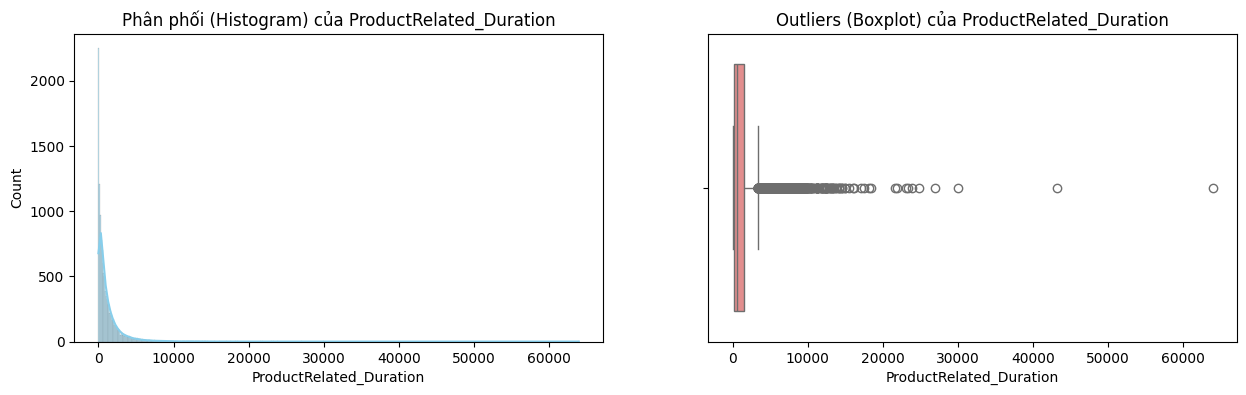

In [29]:
col = 'ProductRelated_Duration'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 6.2 Phân tích về thống kê cột Product Related Duration
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải nặng (Highly Right-Skewed)**. Đuôi của biểu đồ Histogram kéo dài rất xa về phía bên phải (trục X lên tới hơn 60.000).
  * **Đỉnh (Mode):** Cột cao nhất nằm ở khoảng giá trị đầu tiên. Nhìn vào biểu đồ ta thấy đường cong phân phối ở đây có độ thoải nhất định, cho thấy người dùng thực sự dành một khoảng thời gian đáng kể để xem sản phẩm, chứ không chỉ thoát ngay lập tức.
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, đường trung vị nằm lệch về phía bên trái của hộp nhưng tách biệt rõ ràng khỏi mức 0. Điều này cho thấy "người dùng trung bình" dành một lượng thời gian cụ thể (ước lượng vài phút đến vài chục phút) để xem hàng.
    * **Trung bình (Mean):** Do ảnh hưởng cực lớn của các giá trị ngoại lai lên tới 60.000 giây (khoảng 16 tiếng), giá trị Trung bình (Mean = 1194.75) vì thế lớn hơn rất nhiều so với Trung vị (Median = 598.94). 
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải rất rộng, từ 0 đến trên 60.000 (giây). Đây là cột có khoảng biến thiên lớn nhất trong tất cả các cột thời gian. Giá trị min bằng 0 hoàn toàn hợp lý, vì người dùng có thể vào website nhưng không bấm mua trang nào cả. Giá trị lớn nhất 60.000 giây (gần 16 tiếng), có thể không phù hợp về thời gian tương tác thực (active time), nhưng nó vẫn đúng về hành vi và mặt kỹ thuật. Ví dụ như khi người dùng "treo máy", thì con số này vẫn bình thường và hợp lý.
    * **IQR (Interquartile Range):** Độ rộng của Boxplot rõ ràng, thể hiện sự đa dạng trong hành vi của nhóm khách hàng phổ thông (người xem lướt với người xem kỹ). 
    * **Outliers (Giá trị ngoại lai)**
       * Biểu đồ Boxplot cho thấy một dải Outliers **dày đặc**, ước lượng dày đặc và kéo dài liên tục, đều đặn từ khoảng 3500 ngìn giây đến gần 20000 giây. Sau 20000 giây, các outlier phân bố rời rạc, outlier cao nhất có giá trị 60000 giây.
       * **Genuine Extreme Values or Data Entry Errors:**
           * **Các outliers có giá trị bé hơn 50000 giây (gần 1.5 tiếng):** Hoàn toàn bình thường cho một phiên mua sắm tích cực.
           * **Giá trị cực đoan (20.000 - 60.000 giây ~ 5 đến 16 tiếng):** Vì máy ghi tự động, nên đây không phải lỗi nhập liệu. Khả năng cao đây là hành vi của người dùng "treo máy" (có thể là mở tab sản phẩm rồi để đó đi làm việc khác, hoặc quên tắt máy) hoặc bot (máy quét). Nó có thể thật về mặt kĩ thuật, nhưng cũng có nguy cơ không phản ánh đúng "thời gian tương tác thực tế".
           * Nhìn chung, đây vẫn là **dữ liệu thực (genuine values)** nhưng cần phân loại kỹ về mặt hành vi.
* **Chất lượng dữ liệu (Data Quality)**
    * Dựa vào thông số thống kê và biểu đồ:
        * Dữ liệu sạch, không có giá trị âm, không có giá trị phi lý, cũng như không có giá trị placeholders.
        * Cột dữ liệu này có độ biến thiên rất cao, chứa đựng nhiều thông tin quan trọng.

#### 7.1 Thống kê cho cột Bounce Rate


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.02
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 0.05
   - Skewness (Độ lệch): 2.95
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 0.2
   - Q1(25%): 0.0 | Q3(75%): 0.016812558499999998 | IQR: 0.016812558499999998
   - Lower Bound: -0.025218837749999997 | Upper Bound: 0.04203139624999999
   - Số lượng Outliers (IQR method): 1551 | Chiếm 12.58%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 5518
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




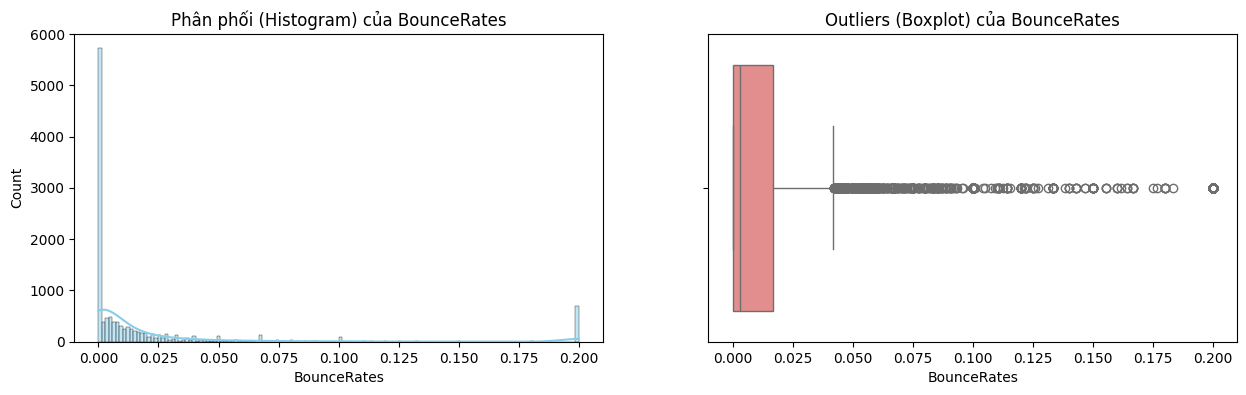

In [30]:
col = 'BounceRates'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 7.2 Phân tích về thống kê cột Bounce Rate
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải cực kì nặng (Extremely Right-Skewed)**. Biểu đồ Histogram cho thấy một cột cao vút tại giá trị 0.00 và phần đuôi kéo dài về phía bên phải.
  * **Đỉnh (Mode):** Cột cao nhất nằm tại giá trị 0.00. Điều này cho thấy phần lớn các phiên truy cập có tỷ lệ Bounce Rate trung bình là 0% (tức là người dùng tương tác tốt, không thoát ngay lập tức từ trang đích). Có một đỉnh phụ nhỏ xuất hiện ở mức cực đại 0.20.
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, ta thấy đường trung vị nằm rất sát mức 0.00. Điều này khẳng định hơn 50% các phiên truy cập có chỉ số Bounce Rate cực thấp hoặc bằng 0.
    * **Trung bình (Mean):** Do sự xuất hiện của dải dữ liệu kéo dài về phía 0.20 (đặc biệt là nhóm outliers), giá trị Trung bình (Mean = 0.02) lớn hơn Trung vị (Median = 0.00).
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Tỉ lệ bound rate thấp nhất là 0.00 và cao nhất là 0.20. Dữ liệu trải dài từ 0.00 đến 0.20, do giá trị này thường được tính toán theo công thức riêng của Google Analytics cho "Average Bounce Rate" của các trang đã xem, nên giá trị max ở đây dừng ở 0.2 là đặc thù của dữ liệu này.
    * **IQR (Interquartile Range):** Boxplot có độ rộng rất hẹp, nằm gói gọn trong khoảng từ 0.00 đến khoảng 0.02. Điều này cho thấy nhóm người dùng phổ thông có chỉ số Bounce Rate rất thấp và đồng nhất.
    * **Outliers (Giá trị ngoại lai)**
       * Biểu đồ Boxplot hiển thị một lượng **Outliers dày đặc và liên tục** bắt đầu từ khoảng 0.05 kéo dài đến 0.20.
       * **Genuine Extreme Values or Data Entry Errors:**
         * Đây là **dữ liệu thực (genuine values)**. Các chỉ số Bounce Rate cao (gần 0.2) đại diện cho nhóm người dùng vào website và thoát ra ngay (không tương tác), hoặc truy cập vào các trang cụ thể có tỷ lệ thoát cao.
         * Sự xuất hiện của một nhóm các outliers tập trung tại mốc 0.20 cho thấy có một nhóm phiên truy cập đạt mức trần của chỉ số này. Đây là hành vi thực tế, không phải do dữ liệu đầu vào sai.
* **Chất lượng dữ liệu (Data Quality)**
    * **Tính hợp lệ:** Dữ liệu nằm trong khoảng dương [0, 0.2], không có giá trị âm.
    * **Tính đầy đủ:** Không có dấu hiệu đứt gãy hay giá trị placeholder lạ.
    * Nhìn chung, dữ liệu sạch. Tuy nhiên, phân phối lệch nhiều về bên phải, và có nhiều điểm dữ liệu có giá trị 0.
        

#### 8.1 Thống kê cho cột Exit Rate


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.04
   - Median (Trung vị): 0.03
   - Std Dev (Độ lệch chuẩn): 0.05
   - Skewness (Độ lệch): 2.15
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 0.2
   - Q1(25%): 0.014285714 | Q3(75%): 0.05 | IQR: 0.035714286000000005
   - Lower Bound: -0.039285715000000006 | Upper Bound: 0.103571429
   - Số lượng Outliers (IQR method): 1099 | Chiếm 8.91%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 76
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




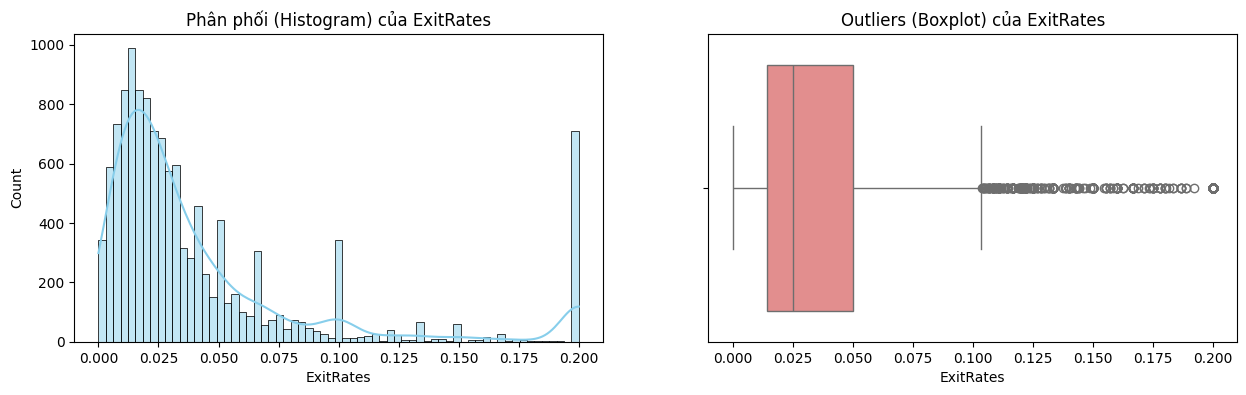

In [31]:
col = 'ExitRates'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 8.2 Phân tích về thống kê cột Exit Rate
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải (Right-Skewed)** nhưng có hình thái đặc biệt. Biểu đồ Histogram cho thấy đỉnh chính nằm ở khoảng giá trị thấp (0.01 - 0.03), nhưng lại có một **đỉnh phụ** đột biến ở giá trị cực đại 0.20.
  * **Đỉnh (Mode):** Giá trị xuất hiện nhiều nhất nằm trong khoảng 0.02 - 0.03 (2-3%). Điều này cho thấy đa số các trang có tỷ lệ thoát thấp, giữ chân người dùng tốt. Tuy nhiên, lượng trang có tỷ lệ thoát 20% cũng chiếm tỷ trọng đáng kể.
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, đường trung vị nằm khoảng 0.025, lệch về phía trái của hộp.
    * **Trung bình (Mean):** Do ảnh hưởng của nhóm dữ liệu lớn tại mức 0.20 (outliers và đỉnh phụ), giá trị Trung bình (Mean = 0.04) lớn hơn Trung vị (Median = 0.03).
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải dài từ 0.00 đến 0.20. Exit rate min bằng 0.0 và Exit rate max bằng 0.2. Các giá trị min và max này là hoàn toàn hợp lệ, vì Exit Rate là tỷ lệ phần trăm (luôn >= 0). 
    * **IQR (Interquartile Range):** Dựa vào độ rộng của boxplot, và thông số IQR = 0,0357, cho thấy rằng 50% các trang web trung bình có tỷ lệ thoát dao động trong mức chấp nhận được. 
    * **Outliers (Giá trị ngoại lai)**
        * Biểu đồ Boxplot cho thấy các điểm ngoại lai bắt đầu xuất hiện sau mốc 0.10 (10%) và tập trung dày đặc thành một vệt đen tại mức 0.20. 
       * **Genuine Extreme Values or Data Entry Errors:** Đây là **dữ liệu thực**. Các trang có Exit Rate cao (đặc biệt là mức 0.20) thường là các trang đích cuối cùng (như trang "Cảm ơn đã mua hàng") hoặc các trang bị lỗi/nội dung kém khiến người dùng thoát ngay.
* **Chất lượng dữ liệu (Data Quality)**
    * Dữ liệu không có giá trị thiếu/ giá trị âm cũng như không có giá trị phi lý và không có giá trị placeholders.  
    * Dữ liệu sạch. Phân phối có tính chất "hai đỉnh" nhẹ (bimodal behavior) ở đầu và cuối, đây là tín hiệu tốt để phân nhóm các trang "Performance tốt" và "Performance kém".

#### 9.1 Thống kê cho cột Page Values


1. Xu hướng tập trung:
   - Mean (Trung bình): 5.89
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 18.57
   - Skewness (Độ lệch): 6.38
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 361.7637419
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 2730 | Chiếm 22.14%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 9600
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




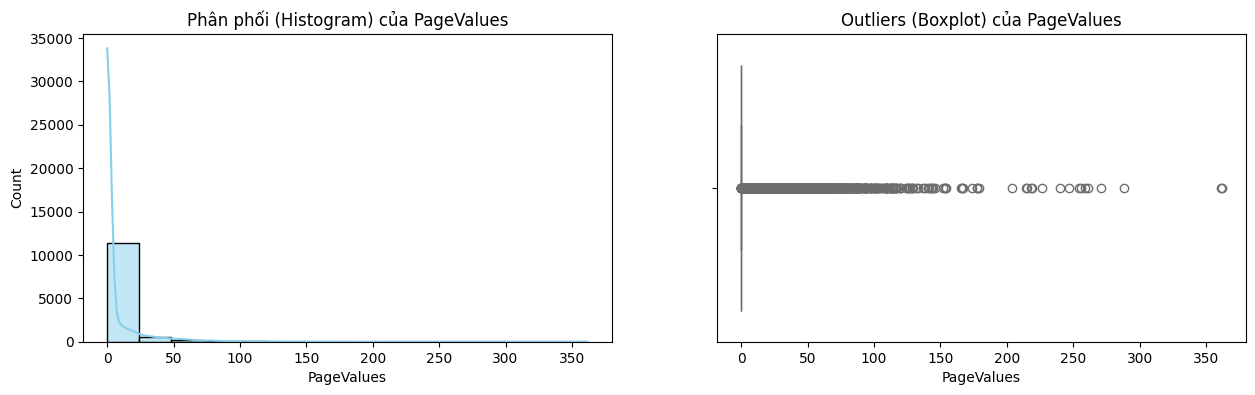

In [32]:
col = 'PageValues'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 9.2 Phân tích về thống kê cột Page Values
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải cực kì nặng (Extremely Right-Skewed)**. Biểu đồ Histogram là một ví dụ điển hình của phân phối Zero-inflated (lạm phát số 0), với cột tại giá trị 0 cao vút và đuôi kéo dài rất mỏng.
  * **Đỉnh (Mode):** Giá trị xuất hiện nhiều nhất tuyệt đối là 0. Điều này phản ánh thực tế: Hầu hết các trang web trong một phiên truy cập không đóng góp trực tiếp vào việc hoàn tất đơn hàng (hoặc người dùng không mua hàng, nên giá trị trang = 0).
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Trên Boxplot, đường trung vị trùng khít với mức 0. Điều này khẳng định phần lớn các trang có PageValue bằng 0.
    * **Trung bình (Mean):** Do tác động của các giá trị ngoại lai rất lớn (lên tới 350), giá trị trung bình (Mean = 5.89) lớn hơn trung vị (Median = 0.00) 
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải dài từ 0 đến khoảng 360. Khoảng biến thiên rất lớn.
    * **IQR (Interquartile Range):** Do Q1 và Q3 và IQR đều bằng 0, IQR. Nhóm dữ liệu trung tâm gần như không có biến động.
    * **Outliers (Giá trị ngoại lai)**
        * Vì Q1, Q3 và IQR đều bằng 0, nên upper bound và lower bound đều bằng 0. Dẫn đến các giá trị lớn hơn 0 đều được xem là outliers. Vì thế, biểu đồ Boxplot hiển thị một dải **Outliers dày đặc và kéo dài** từ sát mức 0 đến hơn 350.
       * **Genuine Extreme Values or Data Entry Errors:** Đây là dữ liệu thực và cực kỳ quan trọng. Những giá trị ngoại lai này đại diện cho các trang web "vàng" (như trang thanh toán, trang sản phẩm hot) đã đóng góp trực tiếp vào doanh thu. Trong bài toán dự đoán hành vi mua hàng, các "outliers" này chính là đặc trưng quan trọng nhất.
* **Chất lượng dữ liệu (Data Quality)**
    * Dữ liệu sạch, không có giá trị âm, không có giá trị phi lý cũng như không có placeholders.
    *  Dữ liệu chất lượng cao cho mục đích phân loại. Mặc dù bị lệch nặng, nhưng sự khác biệt giữa giá trị 0 và lớn hơn 0 là yếu tố then chốt để dự đoán doanh thu.

#### 10.1 Thống kê cho cột Special Day


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.06
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 0.20
   - Skewness (Độ lệch): 3.30
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 1.0
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 1251 | Chiếm 10.15%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 11079
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




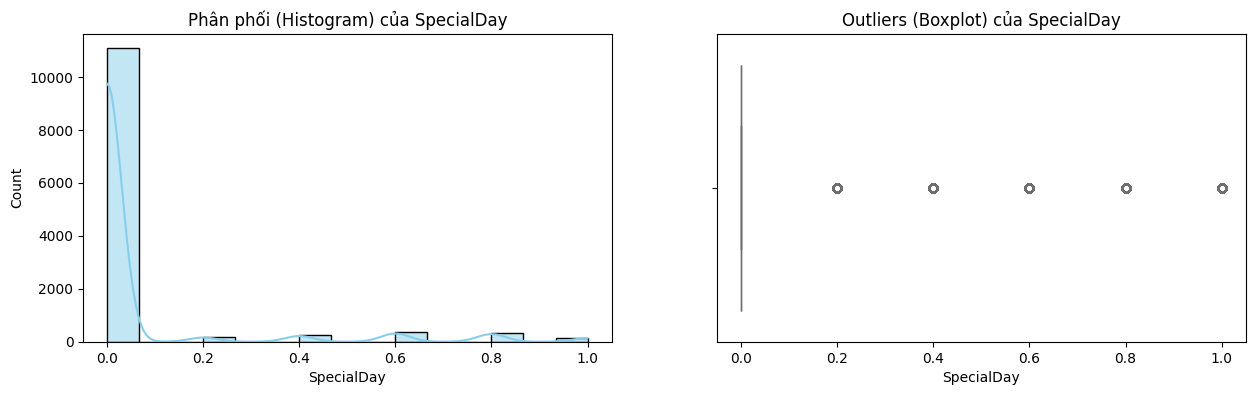

In [36]:
col = 'SpecialDay'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 10.2 Phân tích về thống kê cột Special Day
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải (Right-Skewed)** và có tính chất Rời rạc (Discrete). Biểu đồ Histogram cho thấy cột cao nhất tại 0, và các cột nhỏ thấp dần tại các mốc cụ thể (0.2, 0.4, 0.6, 0.8, 1.0).
  * **Đỉnh (Mode):** Giá trị phổ biến nhất là 0. Phần lớn các phiên truy cập diễn ra vào ngày thường, không gần các ngày lễ đặc biệt.
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Đường trung vị trên Boxplot nằm tại 0, giá trị trung vị bằng 0.
    * **Trung bình (Mean):** Giá trị Mean nhỏ, bằng 0.06 nhưng lớn hơn Median do ảnh hưởng của các giá trị > 0.
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu nằm trong khoảng [0, 1]. Giá trị này biểu thị độ "gần" đến ngày lễ (0 là xa, 1 là chính ngày lễ).
    * **IQR (Interquartile Range):** IQR = 0 (vì cả Q1, Median, Q3 đều bằng 0).
    * **Outliers (Giá trị ngoại lai)**
        * Vì Q1, Q3 và IQR đều bằng 0, nên upper bound và lower bound đều bằng 0. Dẫn đến các giá trị lớn hơn 0 đều được xem là outliers. Hơn nữa, dữ liệu có phân bố rời rạc, nên các outliers tập trung rời rạc tại 0.2, 0.4, 0.6, 0.8, 1.0.
       * **Genuine Extreme Values or Data Entry Errors:** Đây là dữ liệu thực. Chúng đại diện cho các ngày nằm trong "cửa sổ" mua sắm dịp lễ. Việc chúng ít xuất hiện là hiển nhiên vì ngày lễ chỉ diễn ra vài lần trong năm.
       * 
* **Chất lượng dữ liệu (Data Quality)**
    * Dữ liệu sạch, nằm chuẩn trong biên độ [0, 1], không có giá trị âm, không có giá trị phi lý cũng như không có placeholders.
    *  Dữ liệu tốt, phản ánh đúng yếu tố mùa vụ. Do tính chất rời rạc và tập trung tại 0, biến này nên được coi là biến phân loại.

### III. Về các cột Categorical
#### Phân phối giá trị
- Số lượng giá trị khác nhau  
- Top 5–10 giá trị xuất hiện nhiều nhất  
- Tạo biểu đồ: bar chart, count plot  
- Kiểm tra phân phối cân bằng hay lệch  

#### Chất lượng dữ liệu
- Tỷ lệ giá trị thiếu  
- Kiểm tra sự không nhất quán trong category  
- Các giá trị bất thường hoặc quá ít quan sát có nên gộp không

### IV. Giá trị thiếu
- Tạo bảng tổng hợp missing values (tên cột, số lượng, tỷ lệ)  
- Visualize pattern missing values (heatmap hoặc bar chart)  
- Xác định pattern missing values (ngẫu nhiên hay có quy luật)  
- Chiến lược xử lý missing value cho từng cột (remove, impute, giữ riêng category)  

### V. Mối quan hệ và tương quan
- Tính ma trận tương quan giữa các cột số  
- Tạo heatmap tương quan  
- Xác định các cặp biến tương quan mạnh  
- Kiểm tra các mối quan hệ bất ngờ  
- Cross-tabulations:  
  - Categorical × categorical: bảng tần suất  
  - Numerical × categorical: thống kê nhóm

### VI. Nhận xét
#### Tổng quan
- 3–5 điểm quan trọng từ quá trình khám phá dữ liệu  
- Các vấn đề chất lượng dữ liệu được phát hiện  
- Các bước tiền xử lý cần thực hiện  
- Các pattern thú vị có thể dẫn đến câu hỏi nghiên cứu

#### Các vấn đề nghiêm trọng
- Liệt kê các vấn đề chất lượng dữ liệu nghiêm trọng  
- Ghi chú các hạn chế có thể ảnh hưởng đến phân tích